This problem was asked by Facebook.

Given a stream of elements too large to store in memory, pick a random element from the stream with uniform probability.

In [5]:
data = randn(3)

"Returns a function that returns next element from data, or nothing if finished."
function makestream(data)
    i = 0
    function next()
        i += 1
        i <= length(data) ? data[i] : nothing
    end
    next
end

(::var"#next#2"{Vector{Float64}}) (generic function with 1 method)

In [6]:
data

3-element Vector{Float64}:
 -0.4592498041637526
  0.5069414775988813
  1.3805070815692477

In [20]:
stream = makestream(data)
for k = 1:10
    println(stream())
end

-0.4592498041637526
0.5069414775988813
1.3805070815692477
nothing
nothing
nothing
nothing
nothing
nothing
nothing


In [11]:
"Random natural number from 1 to n≥1."
randnat(n::Int) = Int(ceil(n*rand()))  # n*rand() is uniform RV on real interval [0,n)

randnat

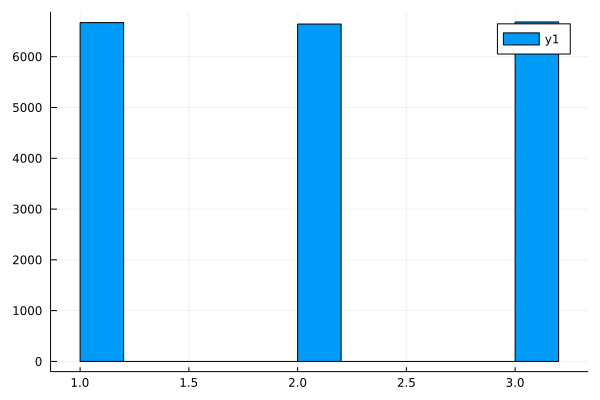

In [18]:
using Plots
histogram([randnat(3) for i∈1:20000])

In [22]:
"Return a uniformly random element of stream where total number of elements is known."
function pickn(stream, n::Int)
    # Pick a random integer i from 1 to n, then return the i-th element using stream.
    i = randnat(n)
    local value
    for j in 1:i
        value = stream()
    end
    value
end

pickn

In [30]:
stream = makestream(data)
println(data)
pickn(stream,length(data))

[-0.4592498041637526, 0.5069414775988813, 1.3805070815692477]


1.3805070815692477

In the case where the number of elements is unknown ahead of time, we could, in principle, read each element from the stream into a growing array until we reach the end of the stream (signaled by "nothing" return value), and then we'd know the number of elements, so that we could then uniformly pick a random element from this array.  Or conceivably we could apply '''pickn''' in another pass, but we'd need some way to "reset" stream to start from the beginning.  But by assumption we don't necessarily have enough memory or are unwilling to provide it.  So how can we handle this?

My approach is to consider the probability of picking the last element from the stream: $1/n$, for $n$ elements total.  That means there's an $(n-1)/n$ probability of picking one of the previous elements.  We can think of a biased coin where we "keep" the one of the first $n-1$ elements with probability $(n-1)/n$, or swap with the last one with probability $1/n$.  This suggests a scheme where we act _as if_ the next element from the stream is the last element, and we swap with it with probability $1/n$, where now $n$ is the number of elements _so far_.  We always start by picking the first element, and we obviously don't change our chosen element if the stream is empty.  At every step we always have a uniform selection of all the elements in the stream that far along.

In [64]:
"Return a uniformly random element of stream where total number of elements is unknown but finite."
function pick(stream)
    n = 1
    next = stream()
    local choice  # = nothing
    while !isnothing(next)
        if rand() < 1/n
            choice = next
        end
        n += 1
        next = stream()
    end
    choice  
end

pick

In [65]:
stream = makestream(data)
println(pick(stream))

1.3805070815692477
